In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
dat = pd.read_csv('/content/drive/MyDrive/Train (2).csv')

##Data Description

In [4]:
dat.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


create a subset of data which only contains selected variables.

In [5]:
subdat=dat[["Warehouse_block", "Mode_of_Shipment", "Cost_of_the_Product","Prior_purchases","Product_importance","Gender","Discount_offered","Weight_in_gms", "Reached.on.Time_Y.N"]]
subdat

,Warehouse_block,Mode_of_Shipment,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,177,3,low,F,44,1233,1
1,F,Flight,216,2,low,M,59,3088,1
2,A,Flight,183,4,low,M,48,3374,1
3,B,Flight,176,4,medium,M,10,1177,1
4,C,Flight,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...
10994,A,Ship,252,5,medium,F,1,1538,1
10995,B,Ship,232,5,medium,F,6,1247,0
10996,C,Ship,242,5,low,F,4,1155,0
10997,F,Ship,223,6,medium,M,2,1210,0


In [6]:
subdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Cost_of_the_Product  10999 non-null  int64 
 3   Prior_purchases      10999 non-null  int64 
 4   Product_importance   10999 non-null  object
 5   Gender               10999 non-null  object
 6   Discount_offered     10999 non-null  int64 
 7   Weight_in_gms        10999 non-null  int64 
 8   Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 773.5+ KB


In [7]:
sub_dat=pd.get_dummies(subdat, columns=["Warehouse_block", "Mode_of_Shipment","Product_importance","Gender"], drop_first = True)
sub_dat

,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,177,3,44,1233,1,0,0,1,0,0,0,1,0,0
1,216,2,59,3088,1,0,0,0,1,0,0,1,0,1
2,183,4,48,3374,1,0,0,0,0,0,0,1,0,1
3,176,4,10,1177,1,1,0,0,0,0,0,0,1,1
4,184,3,46,2484,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,252,5,1,1538,1,0,0,0,0,0,1,0,1,0
10995,232,5,6,1247,0,1,0,0,0,0,1,0,1,0
10996,242,5,4,1155,0,0,1,0,0,0,1,1,0,0
10997,223,6,2,1210,0,0,0,0,1,0,1,0,1,1


## Visualization

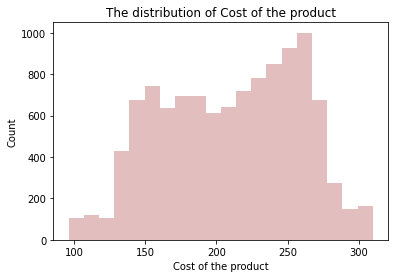

In [8]:
#The distribution of 'Cost_of_the_Product':
plt.hist(dat['Cost_of_the_Product'], bins = 20, facecolor='brown', alpha=0.3)
plt.title("The distribution of Cost of the product")
plt.xlabel("Cost of the product")
plt.ylabel("Count")
plt.show()

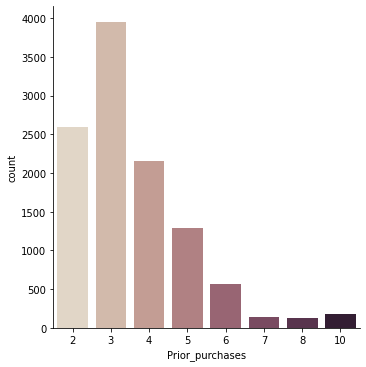

In [9]:
#count the number of observations in each category 'Prior_purchases'
sns.catplot(x="Prior_purchases", kind = "count", palette = "ch:0.25", data = sub_dat)

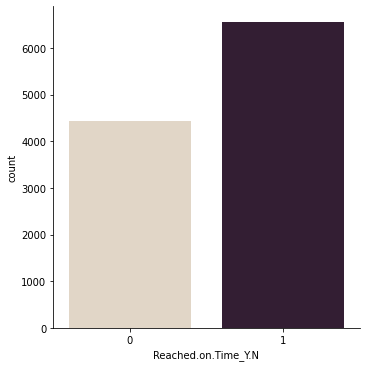

In [10]:
#count the number of observations in each category 'Reached.on.Time_Y.N'

sns.catplot(x="Reached.on.Time_Y.N", kind = "count", palette = "ch:.25", data = sub_dat)

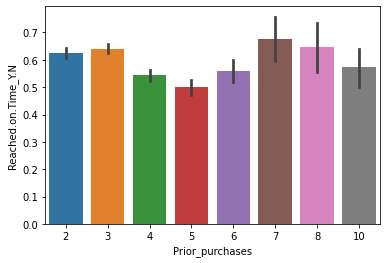

In [ ]:
# visualize relations between a Prior_purchases and Reached.on.Time_Y.N
sns.barplot(x = 'Prior_purchases', y = 'Reached.on.Time_Y.N', data = subdat)

In [ ]:
column = sub_dat.pop('Reached.on.Time_Y.N')
sub_dat.insert(13, 'Reached.on.Time_Y.N', column)
sub_dat

,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M,Reached.on.Time_Y.N
0,177,3,44,1233,0,0,1,0,0,0,1,0,0,1
1,216,2,59,3088,0,0,0,1,0,0,1,0,1,1
2,183,4,48,3374,0,0,0,0,0,0,1,0,1,1
3,176,4,10,1177,1,0,0,0,0,0,0,1,1,1
4,184,3,46,2484,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,252,5,1,1538,0,0,0,0,0,1,0,1,0,1
10995,232,5,6,1247,1,0,0,0,0,1,0,1,0,0
10996,242,5,4,1155,0,1,0,0,0,1,1,0,0,0
10997,223,6,2,1210,0,0,0,1,0,1,0,1,1,0


                           Cost_of_the_Product  ...  Reached.on.Time_Y.N
Cost_of_the_Product                   1.000000  ...            -0.073587
Prior_purchases                       0.123676  ...            -0.055515
Discount_offered                     -0.138312  ...             0.397108
Weight_in_gms                        -0.132604  ...            -0.268793
Warehouse_block_B                     0.018260  ...             0.005106
Warehouse_block_C                     0.009255  ...             0.000132
Warehouse_block_D                     0.006618  ...             0.000830
Warehouse_block_F                    -0.016472  ...             0.002568
Mode_of_Shipment_Road                 0.002531  ...            -0.007671
Mode_of_Shipment_Ship                 0.004419  ...             0.002577
Product_importance_low                0.037361  ...            -0.007667
Product_importance_medium            -0.014785  ...            -0.011099
Gender_M                              0.019759  ...

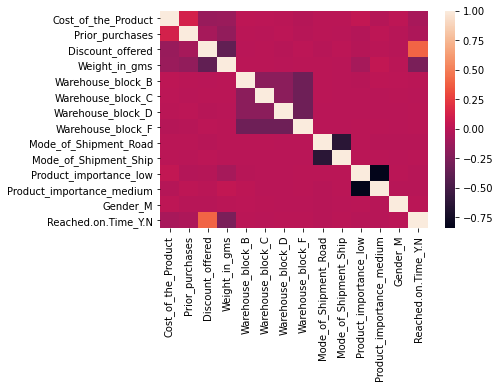

In [ ]:
# finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap
corr = sub_dat.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

##Data Exploration

In [ ]:
X_dat = sub_dat[["Cost_of_the_Product","Prior_purchases","Discount_offered","Weight_in_gms","Warehouse_block_B","Warehouse_block_C","Warehouse_block_D","Warehouse_block_F","Mode_of_Shipment_Road","Mode_of_Shipment_Ship","Product_importance_low","Product_importance_medium","Gender_M"]]
y_dat = sub_dat['Reached.on.Time_Y.N']

print(y_dat)
print(X_dat.head())

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64
   Cost_of_the_Product  Prior_purchases  ...  Product_importance_medium  Gender_M
0                  177                3  ...                          0         0
1                  216                2  ...                          0         1
2                  183                4  ...                          0         1
3                  176                4  ...                          1         1
4                  184                3  ...                          1         0

[5 rows x 13 columns]


In [ ]:
X_dat = sm.add_constant(X_dat)
logit = sm.Logit(y_dat, X_dat)
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.547044
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Reached.on.Time_Y.N   No. Observations:                10999
Model:                           Logit   Df Residuals:                    10985
Method:                            MLE   Df Model:                           13
Date:                 Fri, 07 May 2021   Pseudo R-squ.:                  0.1888
Time:                         02:23:20   Log-Likelihood:                -6016.9
converged:                        True   LL-Null:                       -7417.0
Covariance Type:             nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.2915      0.191      6.756      0.000       0.917       1.666
Cost_of_the_Product          -0.0026      0.000     -5.267      0.000      -0.004      -0.002
Prior_purchases              -0.0823      0.015     -5.439      0.000      -0.112      -0.053
Discount_offered              0.1138      0.004     25.664      0.000       0.105       0.122
Weight_in_gms                -0.0002   1.52e-05    -14.107      0.000      -0.000      -0.000
Warehouse_block_B             0.0852      0.075      1.132      0.258      -0.062       0.233
Warehouse_block_C             0.0522      0.075      0.693      0.488      -0.095       0.200
Warehouse_block_D             0.0621      0.075      0.826      0.409      -0.085       0.209
Warehouse_block_F             0.0422      0.065      0.646      0.518      -0.086       0.170
Mode_of_Shipment_Road        -0.0322      0.077     -0.420      0.674      -0.182       0.118
Mode_of_Shipment_Ship        -0.0150      0.060     -0.249      0.803      -0.133       0.103
Product_importance_low       -0.3566      0.084     -4.268      0.000      -0.520      -0.193
Product_importance_medium    -0.3417      0.084     -4.076      0.000      -0.506      -0.177
Gender_M                      0.0528      0.044      1.211      0.226      -0.033       0.138
=============================================================================================
"""

## Test set Method



In [ ]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(sub_dat[["Cost_of_the_Product","Prior_purchases","Discount_offered","Weight_in_gms","Product_importance_low","Product_importance_medium"]], sub_dat['Reached.on.Time_Y.N'], test_size=0.25)

from sklearn import metrics

### Apply Models
We will use models:
- Logistic regression
- Decision tree
- SVM

And will pick up the best model base on accuracy score

Confusion Matrix for LR model:
[[1128  535]
 [ 454  633]]


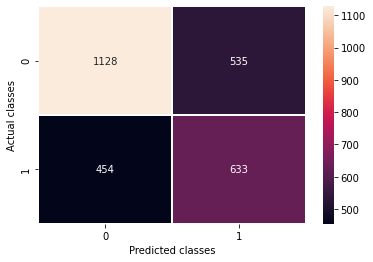

Accuracy Score for LR model: 0.6403636363636364


In [ ]:
# Logistic regression - training
lr = LogisticRegression()
lr.fit(trainX, trainY)

print("Confusion Matrix for LR model:")
print(metrics.confusion_matrix(y_pred = lr.predict(testX), y_true=testY, labels = [1, 0]))

sns.heatmap(metrics.confusion_matrix(y_pred = lr.predict(testX), y_true=testY, labels = [1, 0]),annot = True,fmt="d",linewidths=.5) 
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

print("Accuracy Score for LR model:", lr.score(testX, testY))

0.6832727272727273
[[ 857  806]
 [  65 1022]]


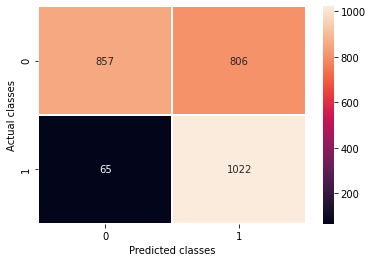

Accuracy Score for Decision Tree model: 0.6832727272727273


In [ ]:
# Decision Tree - training
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(max_depth=5) 
dt.fit(trainX, trainY)
# Testing
print(dt.score(testX, testY)) # accuracy rate
print(metrics.confusion_matrix(y_pred = dt.predict(testX), y_true=testY, labels = [1, 0]))

sns.heatmap(metrics.confusion_matrix(y_pred = dt.predict(testX), y_true=testY, labels = [1, 0]),annot = True,fmt="d",linewidths=.5) 
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

print("Accuracy Score for Decision Tree model:", dt.score(testX, testY))



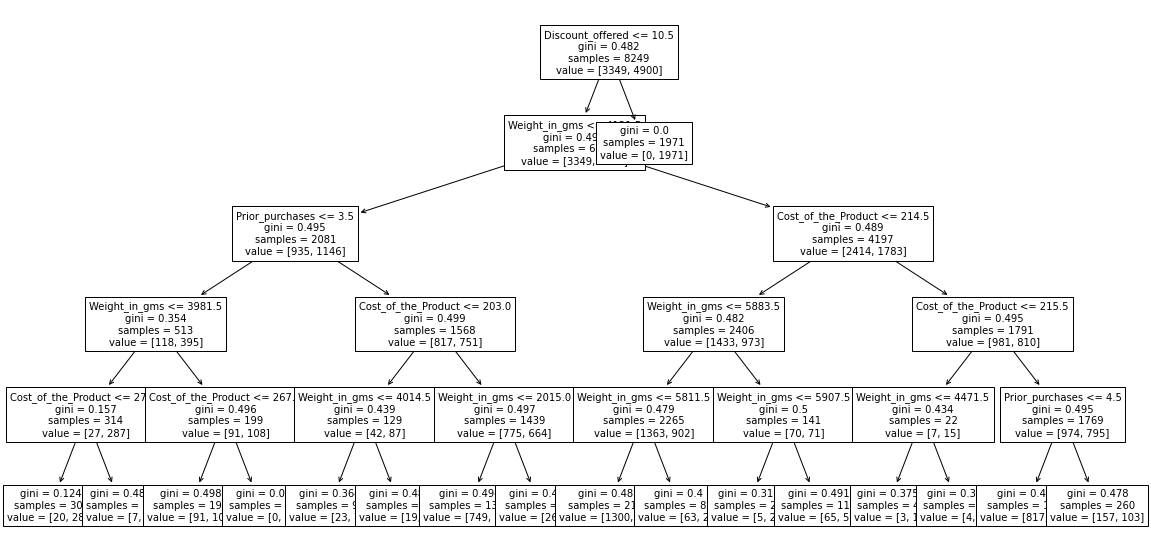

In [ ]:
from sklearn import tree

features = list(trainX.columns)
fig, ax = plt.subplots(figsize=(20, 10)) 
tree.plot_tree(dt, ax=ax, fontsize=10, feature_names = features, max_depth = 5) 

plt.show()

0.6432727272727272
[[1015  648]
 [ 333  754]]


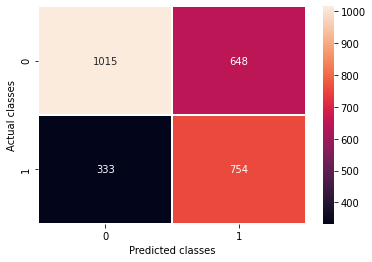

Accuracy Score for SVM model: 0.6432727272727272


In [ ]:
# SVM - training 
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm = svm.fit(trainX, trainY)
# Testing
print(svm.score(testX, testY)) # accuracy rate
print(metrics.confusion_matrix(y_pred = svm.predict(testX), y_true=testY, labels = [1, 0]))

sns.heatmap(metrics.confusion_matrix(y_pred = svm.predict(testX), y_true=testY, labels = [1, 0]),annot = True,fmt="d",linewidths=.5) 
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

print("Accuracy Score for SVM model:", svm.score(testX, testY))